<a href="https://colab.research.google.com/github/ShreyasSam2004/netflix_kaggle_eda/blob/main/Copy_of_Netflix_EDA_SS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q kaggle


In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"shreyassampathkumar","key":"1d7e2db06afdb1bddae00d26e4e689f5"}'}

In [3]:
! mkdir ~/.kaggle

In [4]:
! cp kaggle.json ~/.kaggle/

In [5]:
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle datasets download -d willianoliveiragibin/netflix-interactive


Dataset URL: https://www.kaggle.com/datasets/willianoliveiragibin/netflix-interactive
License(s): CC0-1.0


In [7]:
!unzip netflix-interactive.zip


Archive:  netflix-interactive.zip
  inflating: Netflix Data new.csv    


In [8]:
!ls

'kaggle (1).json'   kaggle.json  'Netflix Data new.csv'   netflix-interactive.zip   sample_data


In [9]:
!pip install seaborn

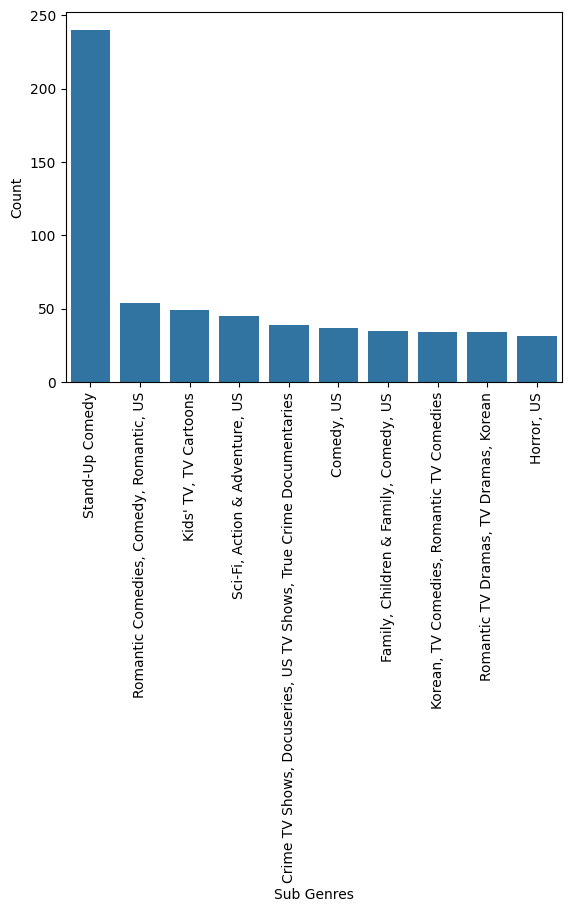

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
df = pd.read_csv("Netflix Data new.csv")  # Adjust the filename as needed
df_Sub_Genres = df['Sub Genres'].value_counts().reset_index().head(10)
df_Sub_Genres.columns = ['Sub Genres', 'Count']
sns.barplot(x='Sub Genres', y='Count', data=df_Sub_Genres)
plt.xticks(rotation=90)
plt.show()

In [11]:
df


,N_id,Title,Main Genre,Sub Genres,Release Year,Maturity Rating,Original Audio,Recommendations
0,215309,Ace Ventura: Pet Detective,Comedy,"Comedy, Mystery, US",1994.0,A,"Hindi, English [Original]","70184054, 60001650, 70112729, 70027007, 115246..."
1,215318,Ace Ventura: When Nature Calls,Comedy,"Comedy, Action & Adventure, US",1995.0,U/A 16+,"Hindi, English [Original]","70184054, 60001650, 70112729, 70027007, 115246..."
2,217258,The Addams Family,Comedy,"Comedy, US",1991.0,U/A 13+,"English [Original], Hindi, English - Audio Des...","81156676, 81231974, 70027007, 80049939, 702179..."
3,217303,Addams Family Values,Comedy,"Comedy, US",1993.0,U/A 13+,"English [Original], Hindi, English - Audio Des...","81156676, 70044593, 81231974, 70027007, 800500..."
4,235527,Agneepath,Drama,"Hindi-Language, Bollywood, Crime, Drama",1990.0,U/A 16+,Hindi [Original],"17517355, 80158546, 80158395, 80074065, 702042..."
...,...,...,...,...,...,...,...,...
6398,81988312,Laila Majnu,Romance,"Hindi-Language, Bollywood, Drama, Romantic, Ba...",2018.0,U/A 13+,Hindi [Original],"80065328, 81994054, 80087743, 81423081, 819940..."
6399,81988313,Veere Di Wedding,Comedy,"Hindi-Language, Bollywood, Comedy",2018.0,U/A 16+,Hindi [Original],"70181653, 80065328, 81672746, 80032081, 703034..."
6400,81992621,Paw Patrol Holiday Fireplace,Kids,"Kids Music, Special Interest",2024.0,U,No Dialogue [Original],"81294811, 81154166, 81272431, 81640914, 815003..."
6401,81994051,Notebook,Drama,"Hindi-Language, Bollywood, Drama, Romantic, So...",2019.0,U/A 7+,Hindi [Original],"80080110, 80065328, 81994054, 80087743, 819883..."


In [12]:
# Set Seaborn style
sns.set(style="darkgrid")

# Figure size for all plots
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<ipython-input-13-c4e7857342d0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Main Genre', palette='husl', order=df['Main Genre'].value_counts().head(15).index)


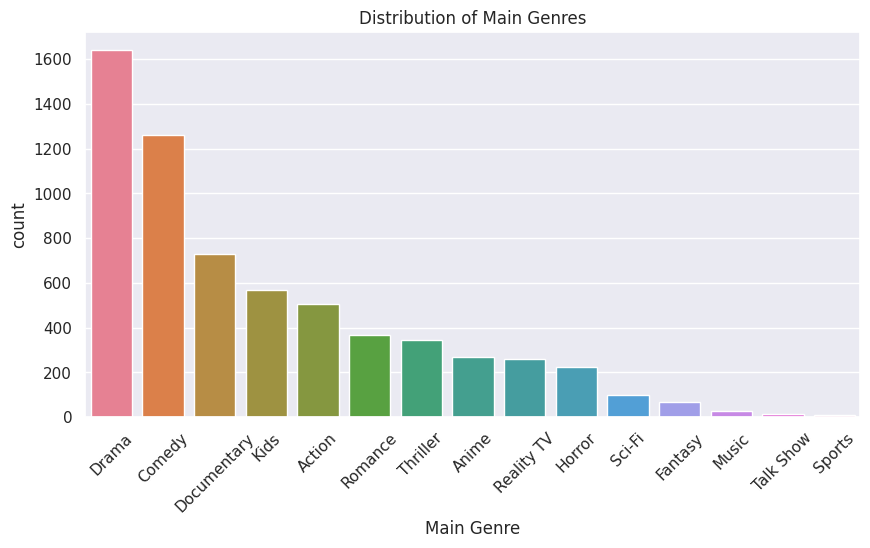

In [13]:
# 1. Bar plot of Main Genre counts
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='Main Genre', palette='husl', order=df['Main Genre'].value_counts().head(15).index)
plt.xticks(rotation=45)
plt.title("Distribution of Main Genres")
plt.show()

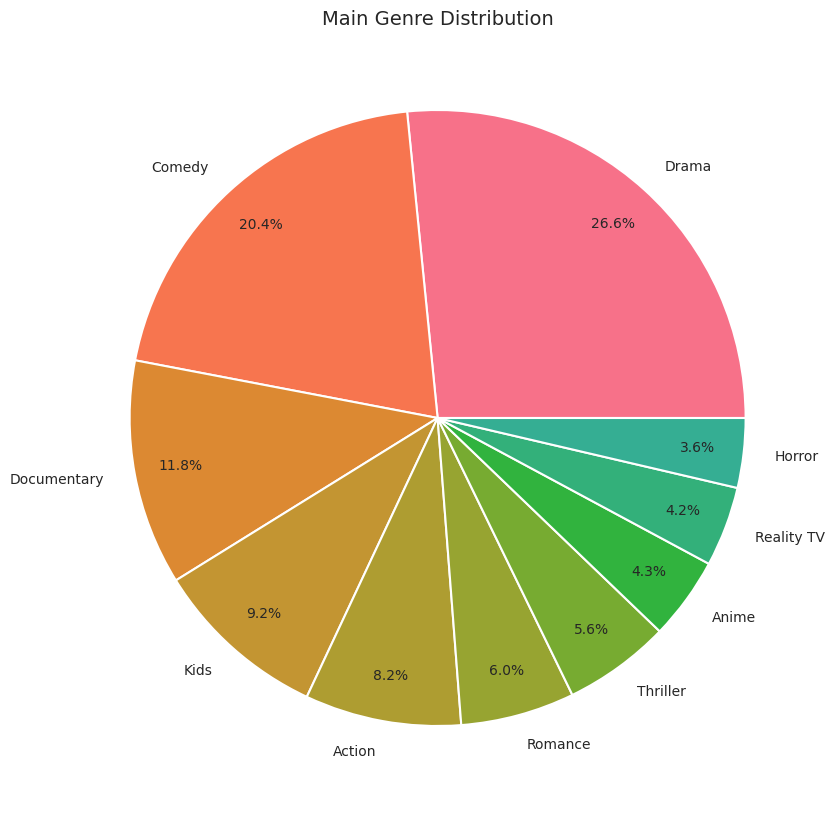

In [14]:
# 2. Pie chart of Main Genre distribution
plt.figure(figsize=(10,10))  # Increase figure size
colors = sns.color_palette('husl', n_colors=len(df['Main Genre'].unique()))


genre_counts = df['Main Genre'].value_counts()
genre_counts = genre_counts[genre_counts > genre_counts.sum() * 0.02]  # Show only genres >2%


genre_counts.plot.pie(
    autopct='%1.1f%%',
    colors=colors,
    pctdistance=0.85,  # Move percentage labels outward
    labeldistance=1.1,  # Move genre labels outward
    wedgeprops={'edgecolor': 'white', 'linewidth': 1.5},  # Add white borders
    textprops={'fontsize': 10}  # Reduce font size for better readability
)

plt.title("Main Genre Distribution", fontsize=14)
plt.ylabel('')  # Remove Y-axis label for better visualization
plt.show()

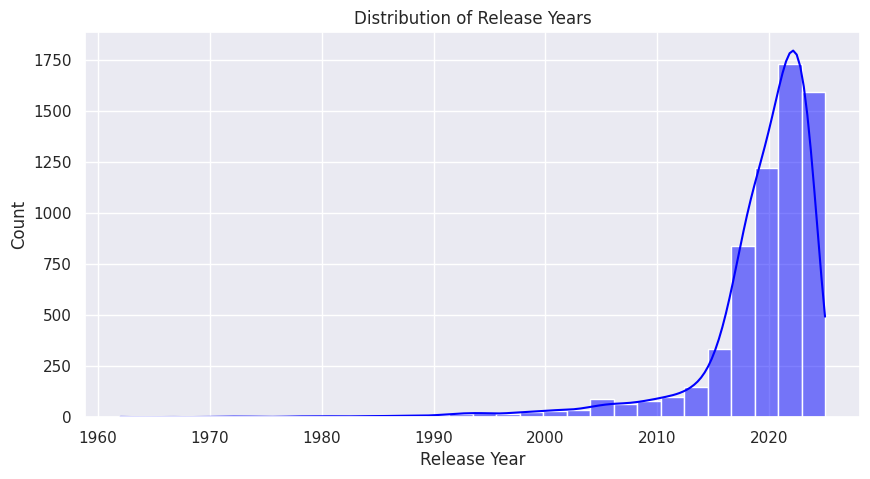

In [15]:
# 3. Histogram of Release Year
plt.figure(figsize=(10,5))
sns.histplot(df['Release Year'], bins=30, kde=True, color='blue')
plt.title("Distribution of Release Years")
plt.show()

<ipython-input-16-693b38faf975>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Main Genre', y='Release Year', palette='coolwarm')


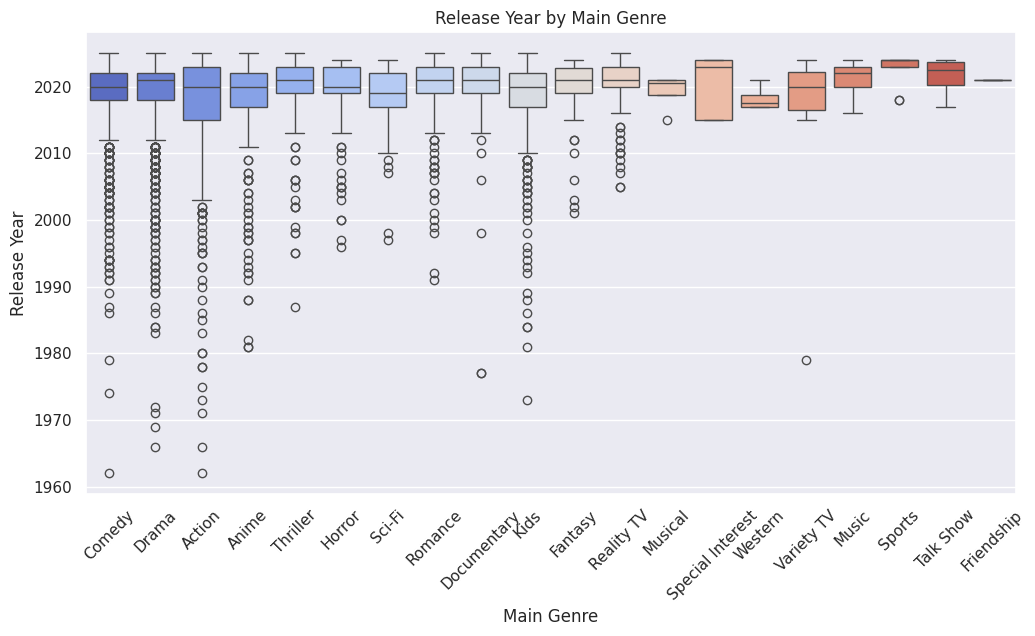

In [16]:
# 4. Box plot of Release Year by Main Genre
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='Main Genre', y='Release Year', palette='coolwarm')
plt.xticks(rotation=45)
plt.title("Release Year by Main Genre")
plt.show()

In [17]:
import plotly.graph_objects as go
import pandas as pd


genre_counts = df.groupby(['Main Genre', 'Original Audio']).size().reset_index(name='count')

top_genres = genre_counts.groupby('Main Genre')['count'].sum().nlargest(10).index
top_languages = genre_counts.groupby('Original Audio')['count'].sum().nlargest(10).index
filtered_data = genre_counts[genre_counts['Main Genre'].isin(top_genres) & genre_counts['Original Audio'].isin(top_languages)]

labels = list(set(filtered_data['Main Genre']).union(set(filtered_data['Original Audio'])))
label_map = {label: i for i, label in enumerate(labels)}

sources = filtered_data['Main Genre'].map(label_map)
targets = filtered_data['Original Audio'].map(label_map)
values = filtered_data['count']

fig = go.Figure(go.Sankey(
    node=dict(
        pad=20,  # Increase padding for spacing
        thickness=25,  # Increase thickness for better visibility
        line=dict(color="black", width=0.8),
        label=labels
    ),
    link=dict(
        source=sources,
        target=targets,
        value=values
    )
))

fig.update_layout(title_text="Optimized Sankey Diagram: Genre to Original Audio", font_size=12)
fig.show()



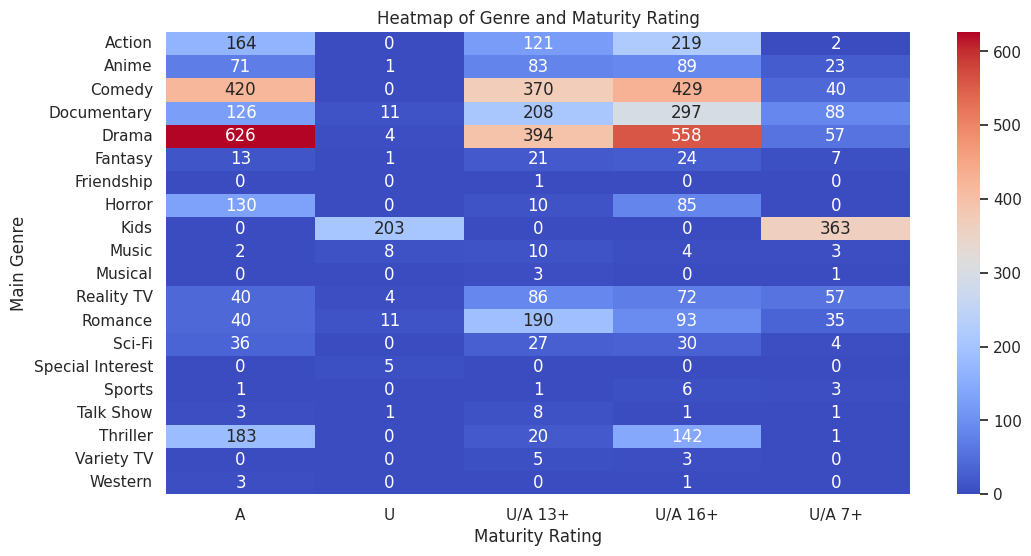

In [18]:
# 6. Heatmap of Genre and Maturity Rating
plt.figure(figsize=(12,6))
genre_rating_counts = pd.crosstab(df['Main Genre'], df['Maturity Rating'])
sns.heatmap(genre_rating_counts, annot=True, fmt='d', cmap='coolwarm')
plt.title("Heatmap of Genre and Maturity Rating")
plt.show()

<ipython-input-19-3eda7754681f>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




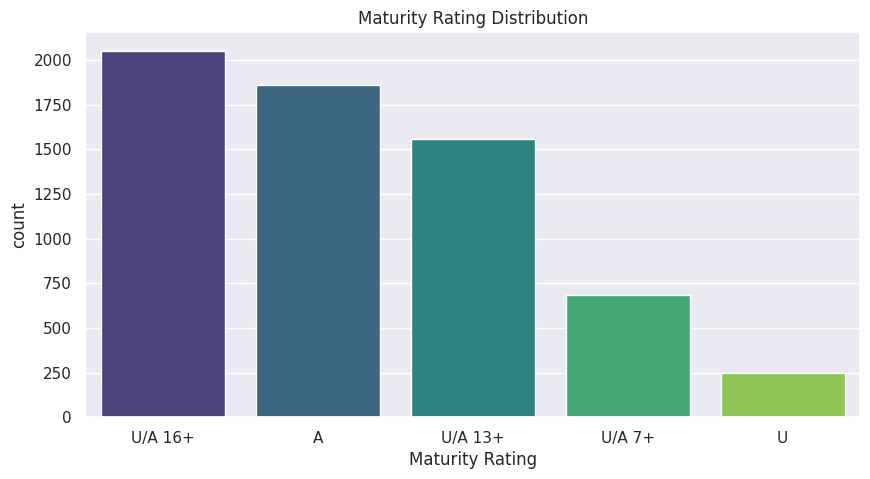

In [19]:
# 7. Bar plot of Maturity Rating counts
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='Maturity Rating', palette='viridis', order=df['Maturity Rating'].value_counts().index)
plt.title("Maturity Rating Distribution")
plt.show()

<ipython-input-20-a677cb737c11>:10: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



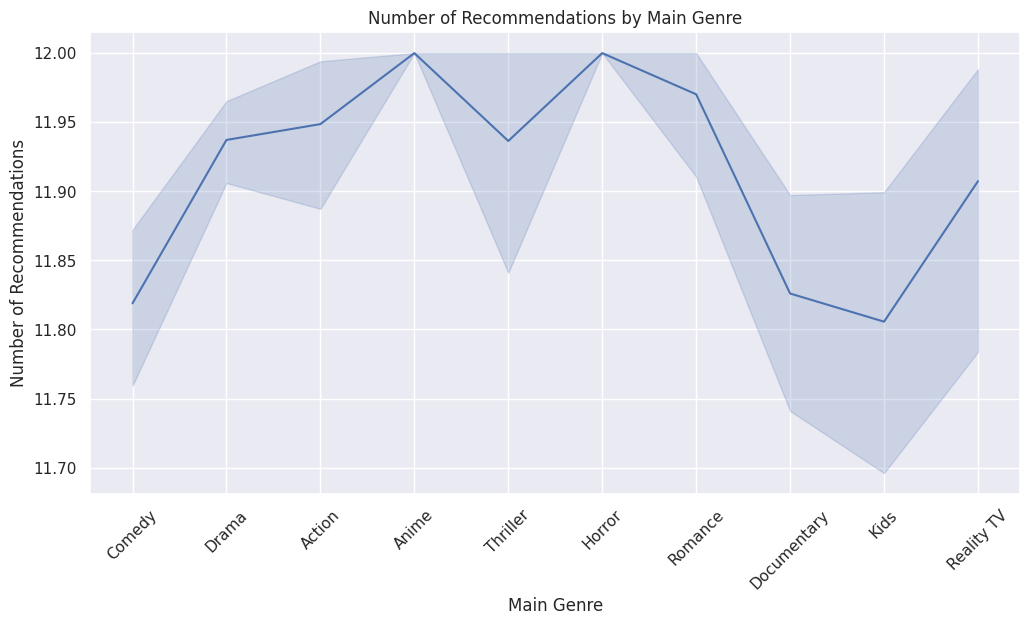

In [20]:
# 8. Box plot of Number of Recommendations by Main Genre
df['Num_Recommendations'] = df['Recommendations'].fillna('').str.split(',').apply(len)


top_genres = df['Main Genre'].value_counts().index[:10]
df_filtered = df[df['Main Genre'].isin(top_genres)]


plt.figure(figsize=(12, 6))
sns.lineplot(data=df_filtered, x='Main Genre', y='Num_Recommendations', palette='Set2')

plt.xticks(rotation=45)  # Rotate x-axis labels
plt.xlabel("Main Genre")
plt.ylabel("Number of Recommendations")
plt.title("Number of Recommendations by Main Genre")

plt.show()

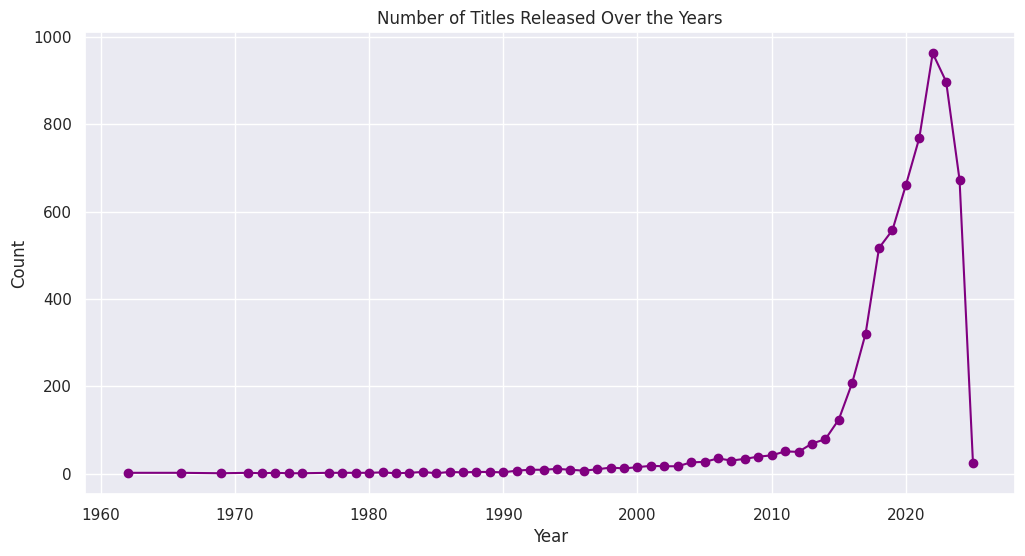

In [21]:
# 9. Line plot of Release Year trend
plt.figure(figsize=(12,6))
df.groupby('Release Year').size().plot(kind='line', marker='o', color='purple')
plt.title("Number of Titles Released Over the Years")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



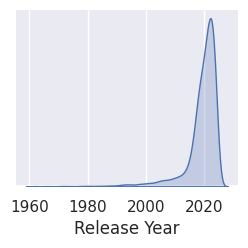

In [22]:
# 10. Pairplot of numerical features
sns.pairplot(df[['Release Year']], diag_kind='kde', corner=True, palette='coolwarm')
plt.show()

<ipython-input-23-95a1320396ad>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




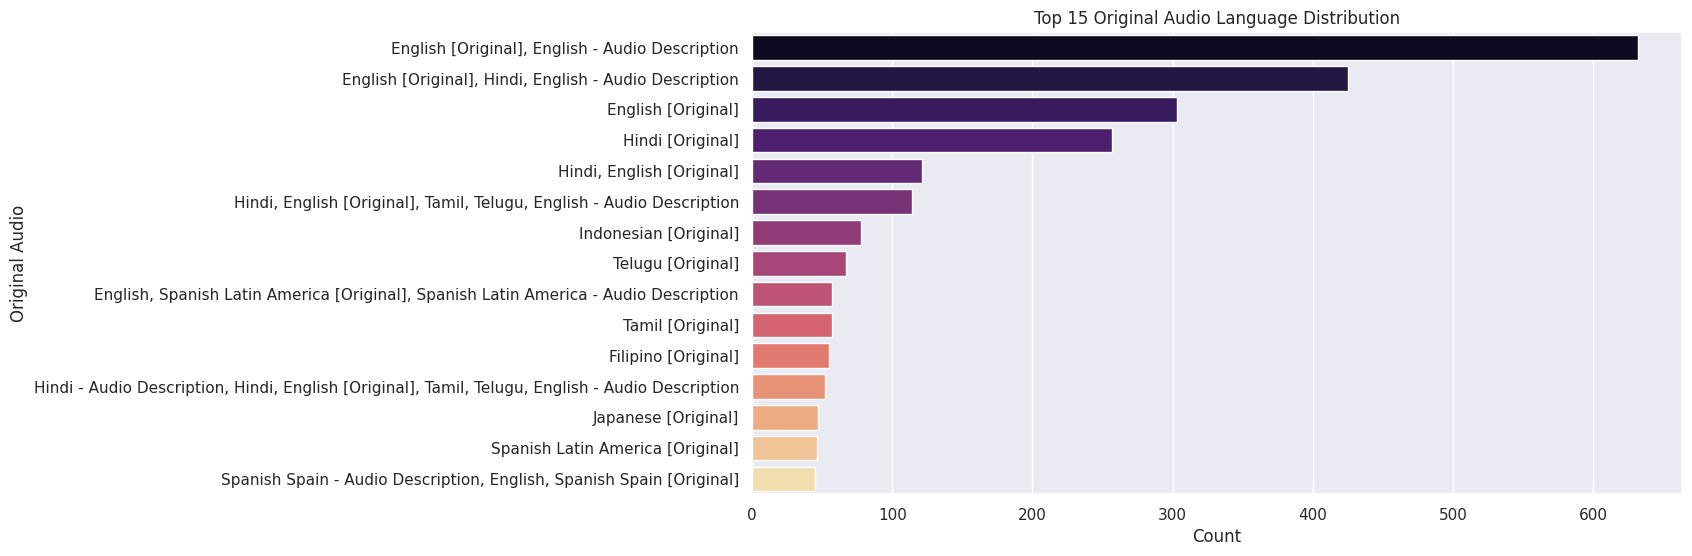

In [23]:
# 11. Count plot of Original Audio Languages
plt.figure(figsize=(12,6))
top_languages = df['Original Audio'].value_counts().nlargest(15)

sns.barplot(y=top_languages.index, x=top_languages.values, palette='magma')

plt.title("Top 15 Original Audio Language Distribution")
plt.xlabel("Count")
plt.ylabel("Original Audio")
plt.show()


<ipython-input-24-12befb596e3a>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




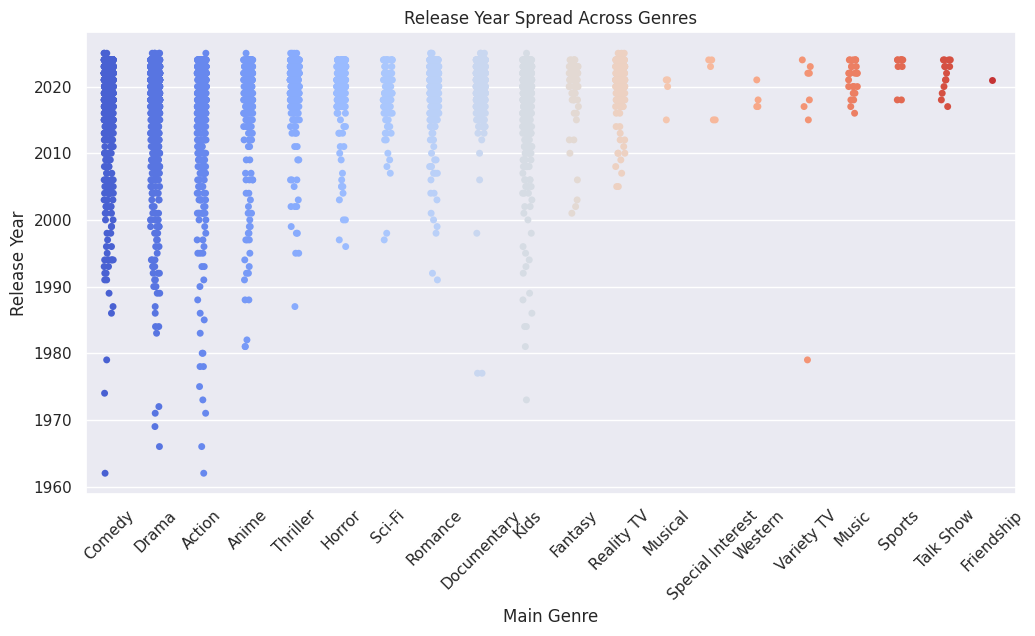

In [24]:
# 12. Strip plot of Release Year by Main Genre
plt.figure(figsize=(12,6))
sns.stripplot(data=df, x='Main Genre', y='Release Year', jitter=True, palette='coolwarm')
plt.xticks(rotation=45)
plt.title("Release Year Spread Across Genres")
plt.show()

<ipython-input-25-9f7d0982b2ad>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




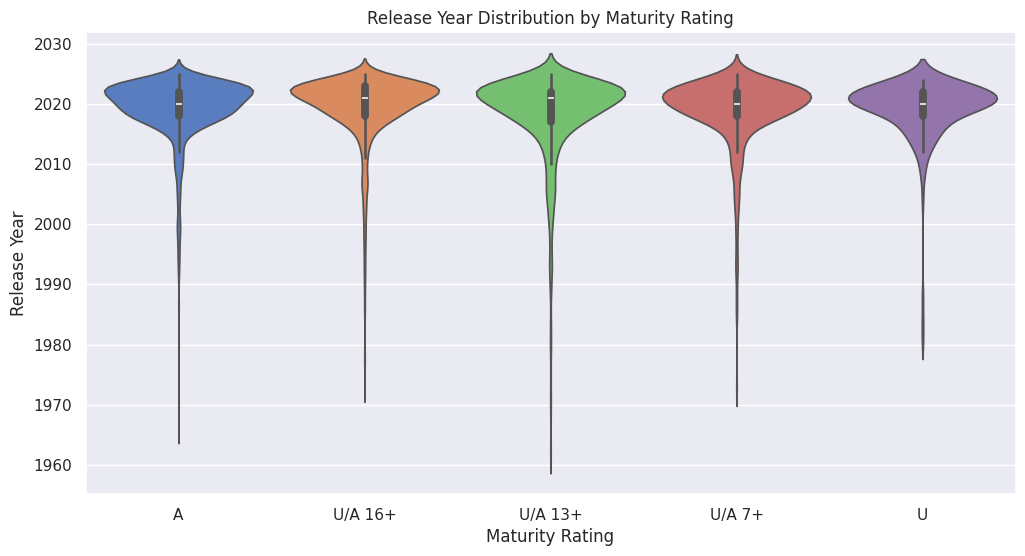

In [25]:
# 13. Violin plot of Release Year by Maturity Rating
plt.figure(figsize=(12,6))
sns.violinplot(data=df, x='Maturity Rating', y='Release Year', palette='muted')
plt.title("Release Year Distribution by Maturity Rating")
plt.show()

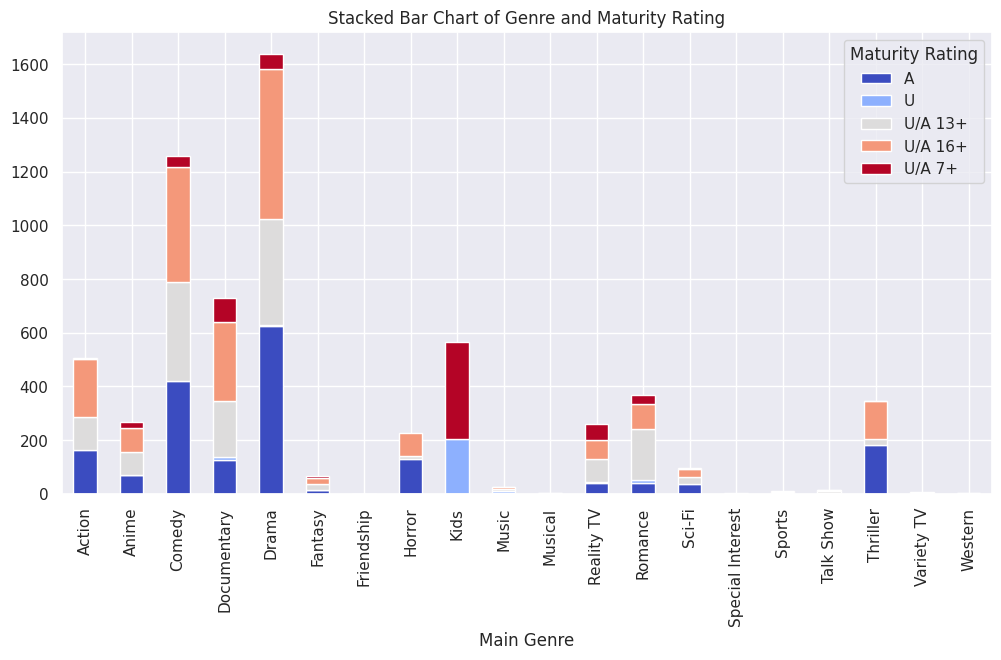

In [26]:
# 14. Stacked Bar Chart of Genre and Maturity Rating
genre_rating_counts.plot(kind='bar', stacked=True, colormap='coolwarm', figsize=(12,6))
plt.title("Stacked Bar Chart of Genre and Maturity Rating")
plt.show()

<ipython-input-27-0342e0498ebb>:3: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




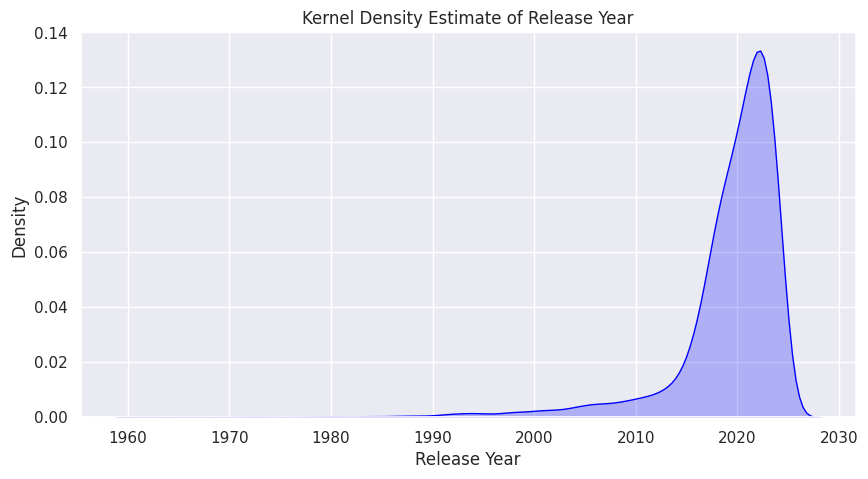

In [27]:
# 15. KDE plot of Release Year distribution
plt.figure(figsize=(10,5))
sns.kdeplot(df['Release Year'], shade=True, color='blue')
plt.title("Kernel Density Estimate of Release Year")
plt.show()

<ipython-input-28-e91b1bf952bb>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning:

88.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning:

90.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning:

71.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning:

63.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.1

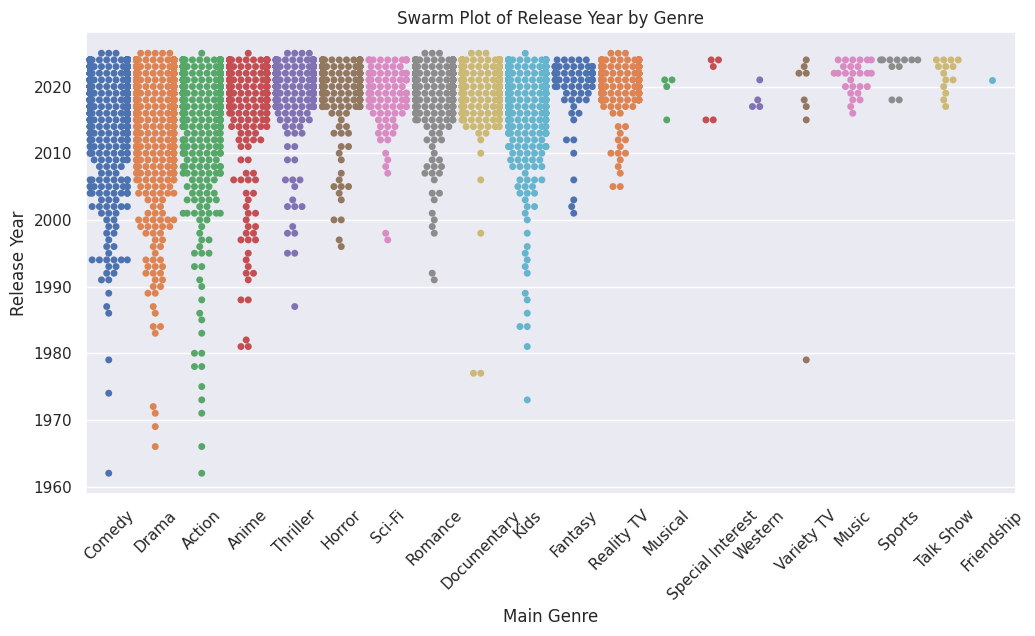

In [28]:
# 16. Swarm plot of Release Year by Main Genre
plt.figure(figsize=(12,6))
sns.swarmplot(data=df, x='Main Genre', y='Release Year', palette='deep')
plt.xticks(rotation=45)
plt.title("Swarm Plot of Release Year by Genre")
plt.show()

In [29]:
!pip install squarify


<Figure size 1000x600 with 0 Axes>

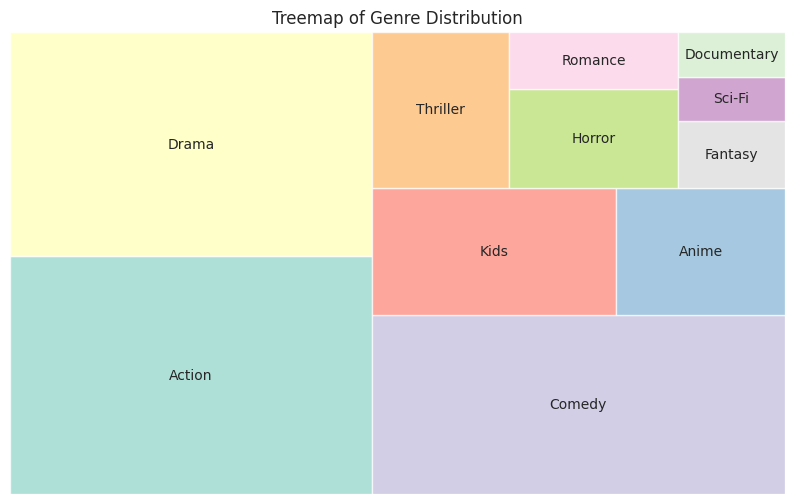

In [30]:
# 17. Treemap of Main Genre Counts
import squarify
plt.figure(figsize=(10,6))
genre_counts = df['Main Genre'].head(150).value_counts()

plt.figure(figsize=(10, 6))


squarify.plot(
    sizes=genre_counts.values,
    label=genre_counts.index,
    alpha=0.7,
    color=sns.color_palette('Set3', len(genre_counts)),
    text_kwargs={'fontsize': 10}  # Reduce font size
)

plt.title("Treemap of Genre Distribution")
plt.axis('off')
plt.show()


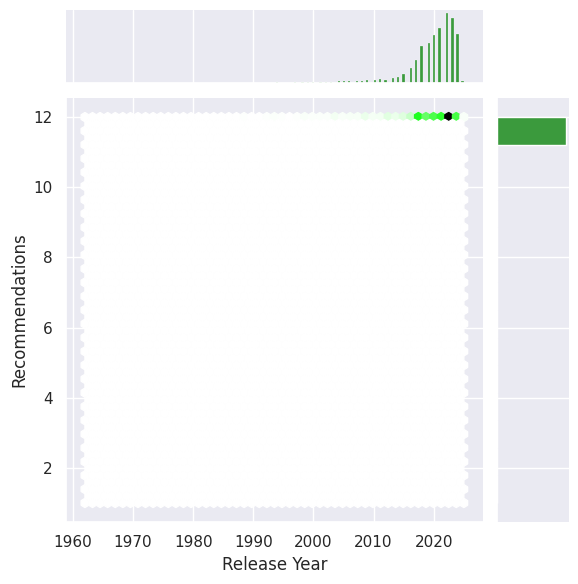

In [31]:
# 18. Jointplot of Release Year vs. Number of Recommendations
import seaborn as sns
import matplotlib.pyplot as plt


df['Recommendations'] = df['Recommendations'].fillna('').astype(str)


sns.jointplot(
    x=df['Release Year'],
    y=df['Recommendations'].str.split(',').apply(len),
    kind='hex',
    color='green'
)

plt.show()



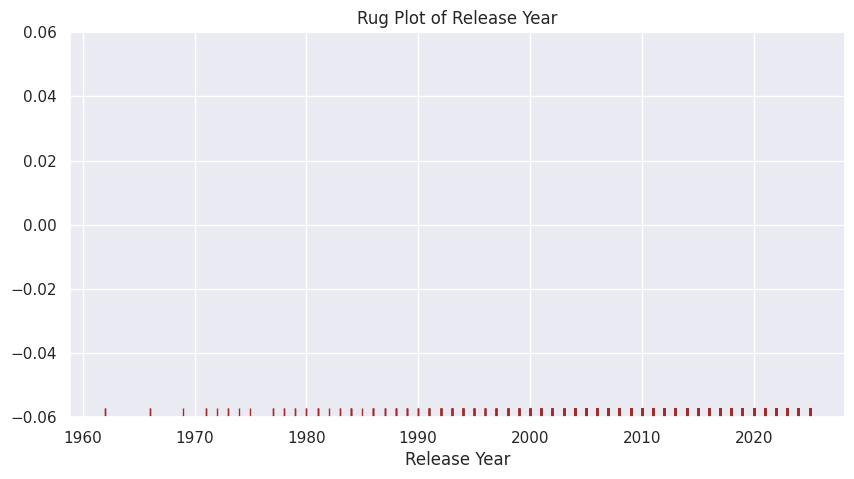

In [32]:
# 19. Rug plot of Release Year
plt.figure(figsize=(10,5))
sns.rugplot(df['Release Year'], color='brown')
plt.title("Rug Plot of Release Year")
plt.show()

In [33]:
df

,N_id,Title,Main Genre,Sub Genres,Release Year,Maturity Rating,Original Audio,Recommendations,Num_Recommendations
0,215309,Ace Ventura: Pet Detective,Comedy,"Comedy, Mystery, US",1994.0,A,"Hindi, English [Original]","70184054, 60001650, 70112729, 70027007, 115246...",12
1,215318,Ace Ventura: When Nature Calls,Comedy,"Comedy, Action & Adventure, US",1995.0,U/A 16+,"Hindi, English [Original]","70184054, 60001650, 70112729, 70027007, 115246...",12
2,217258,The Addams Family,Comedy,"Comedy, US",1991.0,U/A 13+,"English [Original], Hindi, English - Audio Des...","81156676, 81231974, 70027007, 80049939, 702179...",12
3,217303,Addams Family Values,Comedy,"Comedy, US",1993.0,U/A 13+,"English [Original], Hindi, English - Audio Des...","81156676, 70044593, 81231974, 70027007, 800500...",12
4,235527,Agneepath,Drama,"Hindi-Language, Bollywood, Crime, Drama",1990.0,U/A 16+,Hindi [Original],"17517355, 80158546, 80158395, 80074065, 702042...",12
...,...,...,...,...,...,...,...,...,...
6398,81988312,Laila Majnu,Romance,"Hindi-Language, Bollywood, Drama, Romantic, Ba...",2018.0,U/A 13+,Hindi [Original],"80065328, 81994054, 80087743, 81423081, 819940...",12
6399,81988313,Veere Di Wedding,Comedy,"Hindi-Language, Bollywood, Comedy",2018.0,U/A 16+,Hindi [Original],"70181653, 80065328, 81672746, 80032081, 703034...",12
6400,81992621,Paw Patrol Holiday Fireplace,Kids,"Kids Music, Special Interest",2024.0,U,No Dialogue [Original],"81294811, 81154166, 81272431, 81640914, 815003...",12
6401,81994051,Notebook,Drama,"Hindi-Language, Bollywood, Drama, Romantic, So...",2019.0,U/A 7+,Hindi [Original],"80080110, 80065328, 81994054, 80087743, 819883...",12


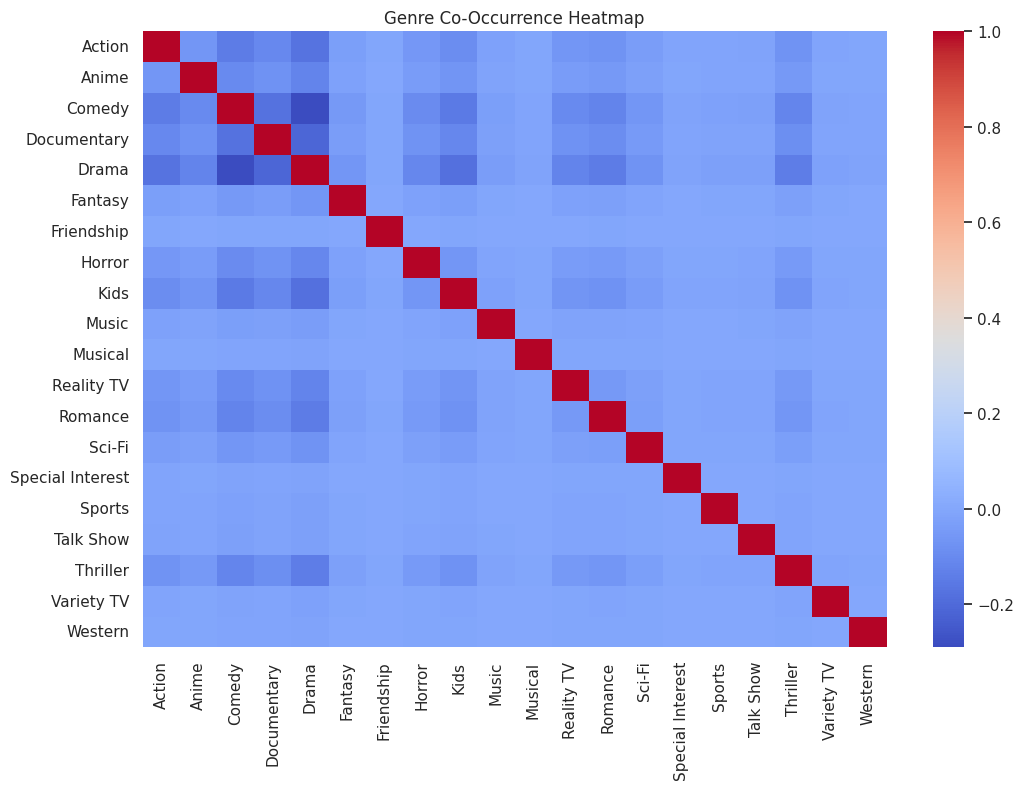

In [34]:
#20 Heat map of genre correlations
#Insight: Shows which genres are commonly paired together
genres = df['Main Genre'].str.get_dummies(sep=', ')
genre_corr = genres.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(genre_corr, cmap='coolwarm', annot=False)
plt.title("Genre Co-Occurrence Heatmap")
plt.show()


In [35]:
#21
import plotly.express as px

# Create a Sunburst Chart
fig = px.sunburst(df, path=['Main Genre', 'Maturity Rating'], values=df['Main Genre'].value_counts().reindex(df['Main Genre']).values,
                  color='Main Genre', color_continuous_scale='RdBu')

fig.update_layout(title_text="Sunburst Chart of Genre & Maturity Rating")
fig.show()


In [36]:
!pip install chord

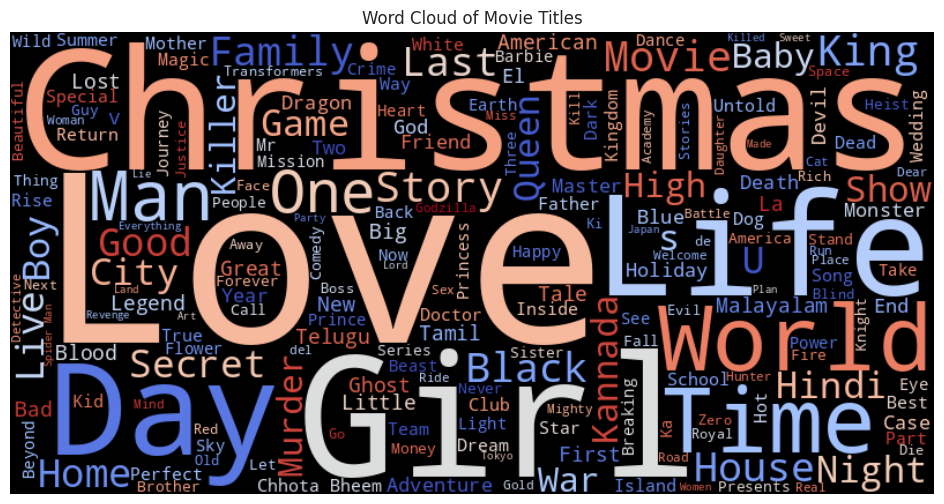

In [37]:
#22
from wordcloud import WordCloud

# Combine all titles
text = ' '.join(df['Title'].dropna())

# Generate WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='coolwarm').generate(text)

# Display the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Movie Titles")
plt.show()


In [38]:
df


,N_id,Title,Main Genre,Sub Genres,Release Year,Maturity Rating,Original Audio,Recommendations,Num_Recommendations
0,215309,Ace Ventura: Pet Detective,Comedy,"Comedy, Mystery, US",1994.0,A,"Hindi, English [Original]","70184054, 60001650, 70112729, 70027007, 115246...",12
1,215318,Ace Ventura: When Nature Calls,Comedy,"Comedy, Action & Adventure, US",1995.0,U/A 16+,"Hindi, English [Original]","70184054, 60001650, 70112729, 70027007, 115246...",12
2,217258,The Addams Family,Comedy,"Comedy, US",1991.0,U/A 13+,"English [Original], Hindi, English - Audio Des...","81156676, 81231974, 70027007, 80049939, 702179...",12
3,217303,Addams Family Values,Comedy,"Comedy, US",1993.0,U/A 13+,"English [Original], Hindi, English - Audio Des...","81156676, 70044593, 81231974, 70027007, 800500...",12
4,235527,Agneepath,Drama,"Hindi-Language, Bollywood, Crime, Drama",1990.0,U/A 16+,Hindi [Original],"17517355, 80158546, 80158395, 80074065, 702042...",12
...,...,...,...,...,...,...,...,...,...
6398,81988312,Laila Majnu,Romance,"Hindi-Language, Bollywood, Drama, Romantic, Ba...",2018.0,U/A 13+,Hindi [Original],"80065328, 81994054, 80087743, 81423081, 819940...",12
6399,81988313,Veere Di Wedding,Comedy,"Hindi-Language, Bollywood, Comedy",2018.0,U/A 16+,Hindi [Original],"70181653, 80065328, 81672746, 80032081, 703034...",12
6400,81992621,Paw Patrol Holiday Fireplace,Kids,"Kids Music, Special Interest",2024.0,U,No Dialogue [Original],"81294811, 81154166, 81272431, 81640914, 815003...",12
6401,81994051,Notebook,Drama,"Hindi-Language, Bollywood, Drama, Romantic, So...",2019.0,U/A 7+,Hindi [Original],"80080110, 80065328, 81994054, 80087743, 819883...",12


In [39]:
df[['Release Year' , 'Num_Recommendations']]

,Release Year,Num_Recommendations
0,1994.0,12
1,1995.0,12
2,1991.0,12
3,1993.0,12
4,1990.0,12
...,...,...
6398,2018.0,12
6399,2018.0,12
6400,2024.0,12
6401,2019.0,12
